In [ ]:
import numpy as np
import pandas as pd
spotify = pd.read_csv("../data/data_principal.csv")

# testing 
'''
spotify.head()
spotify.info()
'''


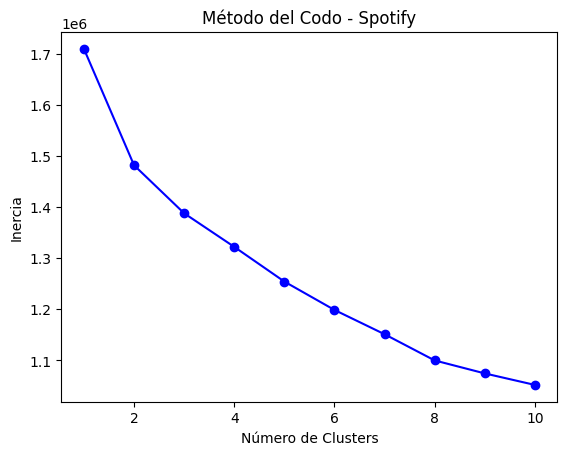

k = 2, Silhouette Score = 0.188
k = 3, Silhouette Score = 0.098
k = 4, Silhouette Score = 0.086
k = 5, Silhouette Score = 0.099
k = 6, Silhouette Score = 0.089
k = 7, Silhouette Score = 0.090
k = 8, Silhouette Score = 0.099
k = 9, Silhouette Score = 0.087
k = 10, Silhouette Score = 0.086


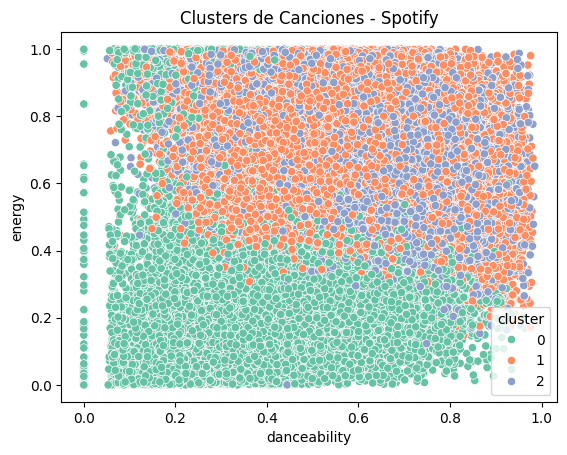

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo columnas numéricas
spotify_num = spotify.select_dtypes(include=["float64", "int64"])

# Eliminar filas con valores faltantes (puedes imputar si prefieres)
spotify_num = spotify_num.dropna()

# Guardar las columnas originales por si se necesitan luego
columnas_originales = spotify_num.columns


scaler = StandardScaler()
X_scaled = scaler.fit_transform(spotify_num)


inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.title("Método del Codo - Spotify")
plt.show()


for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k = {k}, Silhouette Score = {score:.3f}")


k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Guardar los clusters en el DataFrame original
spotify['cluster'] = clusters


sns.scatterplot(data=spotify, x="danceability", y="energy", hue="cluster", palette="Set2")
plt.title("Clusters de Canciones - Spotify")
plt.show()

